In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import math
import sklearn.metrics
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

In [9]:
# output metrics, and plot predicted vs original results
def metrics_plot(y1, y2, plot_graph=True):
    #calculate metrics
    mae = mean_absolute_error(y1, y2)
    mse = mean_squared_error(y1, y2)
    rmse = math.sqrt(mse)
    r2 = r2_score(y1, y2)
    
    #output metrics
    print('MSE:  {}'.format(round(mse, 3)))
    print('RMSE: {}'.format(round(rmse, 3)))
    print('MAE:  {}'.format(round(mae, 3)))
    print('R2:   {}'.format(round(r2, 3)))
    print('\n')

    #plot graph
    if plot_graph == True:
        plt.figure(figsize=(6,6))
        plt.plot(y1*100, y2*100, 'co')
        plt.plot([-0.5, 3], [-0.5, 3], color='black', linewidth=2.0, linestyle='-')
            
        plt.xlabel(r'Prediction ($10^{-3} cm^{-1}$)')
        plt.ylabel(r'Observation ($10^{-3} cm^{-1}$)')
        plt.grid(True)

        plt.xlim((-0.5, 3))
        plt.ylim((-0.5, 3))
    
        plt.show()

    return mse, rmse, mae, r2

In [10]:
# read date from csv file
data = pd.read_excel('kappa.xlsx')

# delete extra columns
X = data.drop(data.columns[0:3], axis=1).drop(data.columns[-1], axis=1)
# X = data.drop(data.columns[-1], axis=1)
y = data[data.columns[-1]]

print(X.shape, y.shape)
#X.head()

(320, 36) (320,)


In [11]:
from sklearn.model_selection import cross_val_predict, train_test_split

# splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# scaling features
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform (X_test)

MSE:  0.0
RMSE: 0.0
MAE:  0.0
R2:   0.778




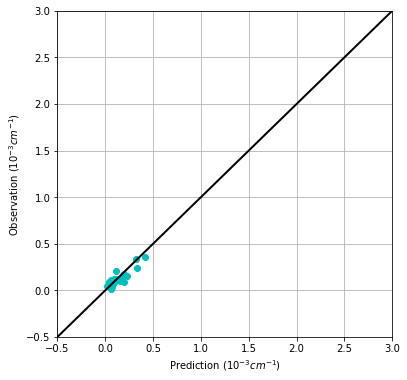

In [13]:
from sklearn import linear_model

# simple linear regression model
lr = linear_model.LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

mse_lr, rmse_lr, mae_lr, r2_lr = metrics_plot(y_test, y_pred, plot_graph=True)